<a href="https://colab.research.google.com/github/Eban-Covarrubias/TweetsSentimentAnalysis/blob/main/NLPSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!git clone https://github.com/Eban-Covarrubias/TweetsSentimentAnalysis

Cloning into 'TweetsSentimentAnalysis'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 1.77 MiB | 3.38 MiB/s, done.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output


In [30]:
data = pd.read_csv('/content/TweetsSentimentAnalysis/train.csv', encoding='latin1')
#this new csv file uses different encoding
# Keeping only the neccessary columns
data.head()
#data = data[['text','sentiment']]

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [33]:
data = data[['text', 'sentiment']]#only need these two columns
data.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [74]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "neutral"]

In [85]:
train.head()
unique_values_count = train['sentiment'].unique()
print(unique_values_count)#we only have positive and negative
for col in train.columns:
  print(col)

['positive' 'negative']
text
sentiment


In [91]:
train_pos = train[ train['sentiment'] == 'positive']
#train_pos = train_pos['text']
#print(train_pos.size)
train_neg = train[ train['sentiment'] == 'negative']
#train_neg = train_neg['text']
#print(train_neg.size)

In [92]:
train_pos = train_pos['text']
train_neg = train_neg['text']

In [93]:
for tweet in train_pos:
    print(tweet)

Streaming output truncated to the last 5000 lines.
Wishes  a Happy Mother`s Day!
home from the beach and only my feet are burned. i am proud of myself and the sunscreen.
watching Season 2, episode 1 of House before bed... what a great bedtime story
 No I LOVE Jordie`s version as well as Joe`s and Donnie`s ALL 3 are DIFFERENT
Well can ya please send some luvin to    im sensing deep fiery anger surrounding his presence right now...
watching #f1. I live near MontmelÃ¯Â¿Â½, I`m so excited about this race
 Interview! 177 views! 22 away from 200!! Thanx for reading ppl!!  http://tiny.cc/GmKbT #mattmccoy
 just make sure you have it well done
Saw the UCLA bookstore...now convinced that every single major university has a better bookstore than    Having fun so far!
Can you believe it:Tomorrow Night will be Jay Leno`s last episode of the Tonight Show  I encourage everyone to watch it and welcome Conan.
welcome to the family new pillow  im going to lay my head on you tonight!!!
Rice is ready to e

In [109]:
for tweet in train_neg:
  print(tweet)

Streaming output truncated to the last 5000 lines.
watching a boring police prog after making a fab pasta dinner, trying to cut down on alcohol so only had water
Doh. In a rush to get to the Puma Open and I just got pulled over. So sad.
 Not having Hulu in Germany sucks
Finally out of school for today! HAD TO SIT IN LIBRARY FOR A LONG TIME
Also I popped the phone open and got all that goddamn dust out, but I wore out a clip on the camera panel so I had to glue it shut
OK its official I'M OLD! at least I feel likewise OLD & TIREDD & WASTED!!
Cruising 'Serious Eats NY' does not bode well for a future in GA. Missing NYC gastronomical tour..  http://newyork.seriouseats.com/
 Just go near a hive, they`ll tame you!
_x Haha, You sound like lizzie :L she`s got a sister who is older than her, and she`s like argh :@ all the time
I have too much homework to do today
Ok getting the pink stripey one it`s the most subtle I`m a bit bored of the floral print! Ok?
I came home thinking that maybe there 

Positive words


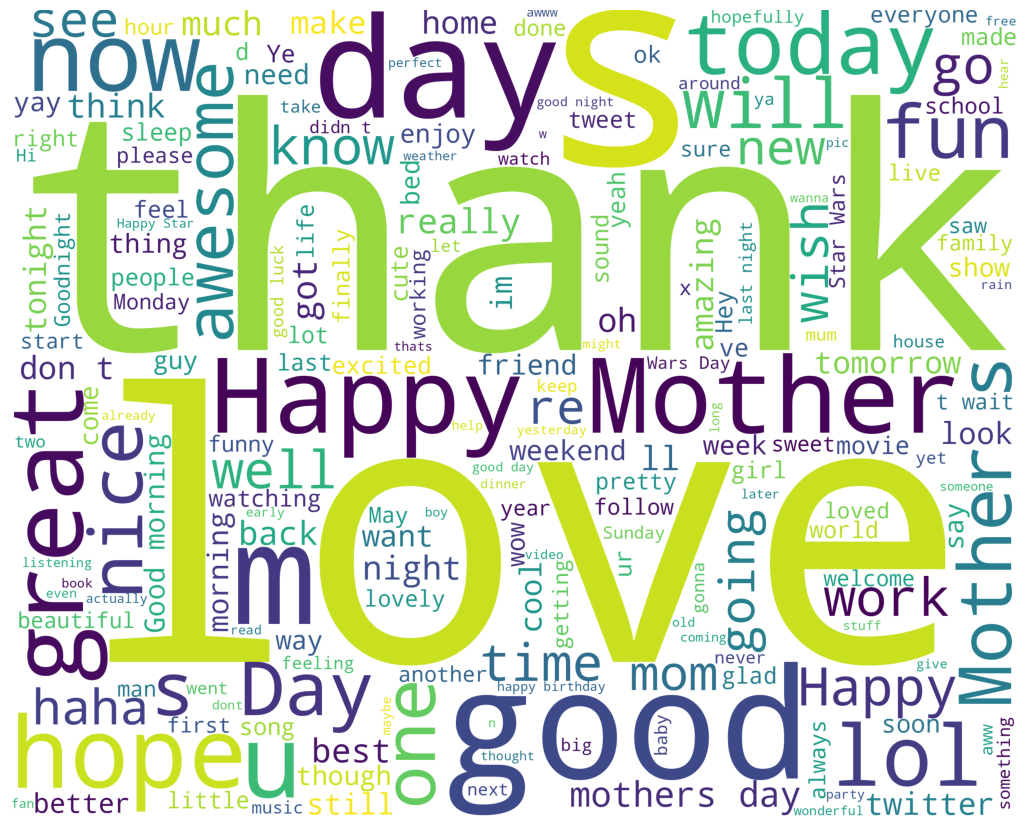

Negative words


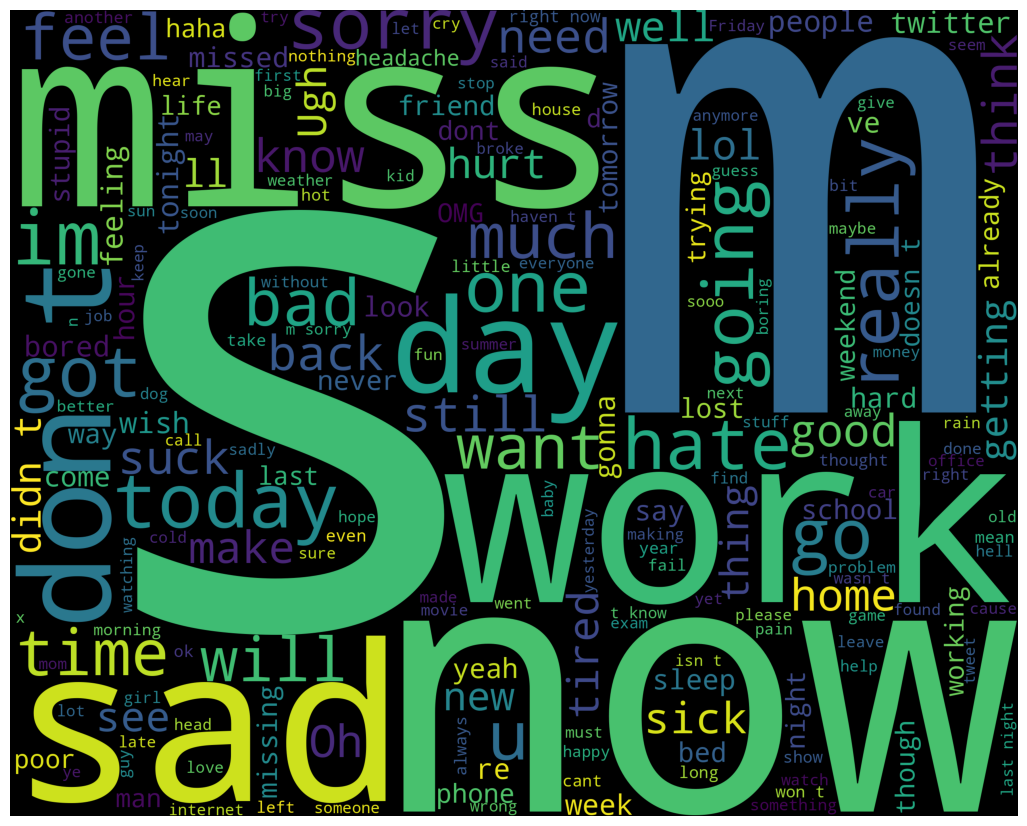

In [94]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [96]:
tweets = []
nltk.download('stopwords')
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'negative']
test_neg = test_neg['text']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
# Extracting word features
# This is suited for naive bayes approach
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [98]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [99]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'negative'):
        neg_cnt = neg_cnt + 1
for obj in test_pos:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'positive'):
        pos_cnt = pos_cnt + 1

print('[negative]: %s/%s '  % (len(test_neg),neg_cnt))
print('[positive]: %s/%s '  % (len(test_pos),pos_cnt))

[negative]: 788/629 
[positive]: 863/709 


In [103]:
neg_cnt = 0
pos_cnt = 0
other_cnt = 0
for obj in test_neg:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'negative'):
      neg_cnt += 1
    elif(res == 'positive'):
      pos_cnt += 1
    else:
      other_cnt += 1
      #print(res)
print(neg_cnt)
print(pos_cnt)
print(other_cnt)



629
159
0


In [110]:
classifier.classify(extract_features(""))
#this has some issues, getting false positives everywhere

'positive'

In [105]:
classifier.classify(extract_features("Today is such a good day, I am so happy and glad about everything"))

'positive'